In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal

In [42]:
TARGET_DIR = "E:\\"

SAMPLE_RATE = int(61.44e6) # samples per second

SEC_PER_SAMP = 1/SAMPLE_RATE
SEC_PER_PACKET = 0.0005 # play with this a bit; figure out using "proof by eyecrometers"
SAMP_PER_PACKET = SEC_PER_PACKET/SEC_PER_SAMP

NFFT_SIZE = int(SAMP_PER_PACKET)

print(NFFT_SIZE)

30720


The way I think of how NFFT works is "resolution" of the FFT calculation.
"How many samples does it take at a time to calculate the frequency domain?"
Ideally, it will calculate however long it takes for the monitor to send a transmission, so we calculate it one "hop" at a time.

See Tables 16.1 and 16.2 on pages 71 and 72 of the datasheet.
Tldr, the transmission time _per packet_ can be anywhere from 288 to 988 microseconds, depending on a number of variables.

In [43]:
def loadData(filepath):
    dat = np.fromfile(filepath, dtype="float32")
    dat = dat[0::2] + 1j*dat[1::2]
    return dat

def getMaxFreqs(spectrumDF, freqs):
    assert(len(spectrumDF) == len(freqs))

    maxFreqs = []

    for (columnIndex, columnData) in spectrumDF.items():
        # maxFreqs.append(freqs[spectrumDF[[i]].idxmax()])
        print(freqs[columnData.idxmax()])

    return maxFreqs

15312000.0
15516000.0
15512000.0
15486000.0
498000.0
-10002000.0
-3806000.0
-3704000.0
-11578000.0
8998000.0
17032000.0
15500000.0
19998000.0
-1018000.0
-28654000.0
-7502000.0
-8494000.0
500000.0
-20500000.0
-20252000.0
2002000.0
-3820000.0
9718000.0
10000000.0
-2998000.0
15500000.0
14264000.0
-758000.0
29004000.0
10920000.0
-23498000.0
-8998000.0
504000.0
-21002000.0
23000000.0
2056000.0
2002000.0
-4106000.0
9994000.0
-18890000.0
-2794000.0
-5498000.0
14108000.0
-932000.0
2014000.0
11000000.0
-23772000.0
-8594000.0
7498000.0
-20704000.0
25994000.0
-10022000.0
2134000.0
1500000.0
-11490000.0
9560000.0
-2994000.0
-5496000.0
14178000.0
-832000.0
29080000.0
-23000000.0
8000000.0
-20492000.0
26236000.0
-9898000.0
-3954000.0
-4002000.0
9496000.0
8994000.0
-2424000.0
15998000.0
-5998000.0
-998000.0
-28566000.0
29002000.0
-23494000.0
-8218000.0
8518000.0
0.0
26292000.0
-10008000.0
2058000.0
2054000.0
-4004000.0
9616000.0
-19008000.0
-1992000.0
-5504000.0
13978000.0
-28820000.0
29504000.0
-235

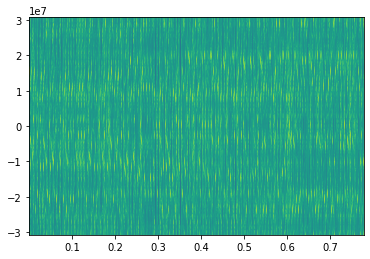

In [44]:
dat = loadData(f"{TARGET_DIR}normal1")
spectrum, freqs, t, im = plt.specgram(dat, NFFT=NFFT_SIZE, Fs=SAMPLE_RATE)

spectrumDF = pd.DataFrame(spectrum)
maxFreqs = getMaxFreqs(spectrumDF, freqs)
print(maxFreqs)